In [20]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [21]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = load_dataset()

X_train = X_train_orig/255
Y_train = Y_train_orig.T

X_test = X_test_orig/255
Y_test = Y_test_orig.T

print("no. of training examples: ",X_train.shape[0])
print("no. of test examples: ",X_test.shape[0])
print()
print("X_train.shape:",X_train.shape)
print("Y_train.shape:",Y_train.shape)
print()
print("X_test.shape:",X_test.shape)
print("Y_test.shape:",Y_test.shape)
print()

no. of training examples:  600
no. of test examples:  150

X_train.shape: (600, 64, 64, 3)
Y_train.shape: (600, 1)

X_test.shape: (150, 64, 64, 3)
Y_test.shape: (150, 1)



In [57]:
def HappyModel(input_shape):

    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)

    X = Conv2D(32,(7,7),strides=(1,1),name='conv0')(X)
    X = BatchNormalization(axis=3,name='bn0')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((2,2),name='maxpool0')(X)
    
    X = Flatten()(X)
    X = Dense(1,activation='sigmoid',name='fc0')(X)

    model = Model(inputs=X_input,outputs=X,name='happy_model')
    return model

In [58]:
happy_model = HappyModel((64,64,3))

In [60]:
happy_model.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['accuracy'])

In [61]:
happy_model.fit(x = X_train,y = Y_train,epochs = 50,batch_size = 60)

Epoch 1/50
10/10 [==============================] - 3s 202ms/step - loss: 2.7225 - accuracy: 0.5217
Epoch 2/50
10/10 [==============================] - 2s 216ms/step - loss: 0.6026 - accuracy: 0.7583
Epoch 3/50
10/10 [==============================] - 2s 246ms/step - loss: 0.3051 - accuracy: 0.8700
Epoch 4/50
10/10 [==============================] - 2s 211ms/step - loss: 0.1872 - accuracy: 0.9267
Epoch 5/50
10/10 [==============================] - 2s 208ms/step - loss: 0.1503 - accuracy: 0.9450
Epoch 6/50
10/10 [==============================] - 2s 251ms/step - loss: 0.1152 - accuracy: 0.9667
Epoch 7/50
10/10 [==============================] - 2s 201ms/step - loss: 0.1040 - accuracy: 0.9700
Epoch 8/50
10/10 [==============================] - 2s 221ms/step - loss: 0.1045 - accuracy: 0.9683
Epoch 9/50
10/10 [==============================] - 2s 238ms/step - loss: 0.0771 - accuracy: 0.9850
Epoch 10/50
10/10 [==============================] - 3s 253ms/step - loss: 0.0716 - accuracy: 0.9833

In [62]:
preds = happy_model.evaluate(x = X_test,y = Y_test)

5/5 [==============================] - 1s 129ms/step - loss: 0.1245 - accuracy: 0.9400


1/1 [==============================] - 0s 54ms/step
[[0.]]


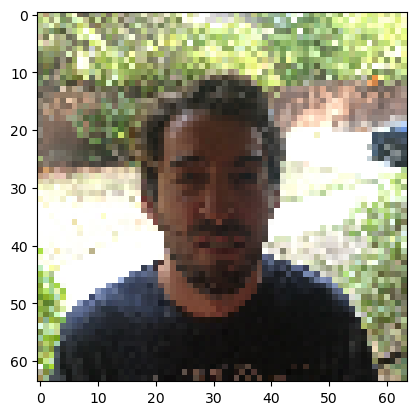

In [63]:
### START CODE HERE ###
img_path = 'images/my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happy_model.predict(x))